In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_goldfeldquandt
import scipy.stats as stats


import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [37]:
df_2010 = pd.read_csv('data_2010.csv')
df_2017 = pd.read_csv('data_2017.csv')
df_2010['age^2'] = df_2010['age'].apply(lambda x: x**2)
df_2017['age^2'] = df_2017['age'].apply(lambda x: x**2)

In [38]:
df_2010.columns

Index(['salary', 'age', 'sector', 'job_group', 'gender', 'region',
       'education_level_2', 'is_married', 'num_of_child', 'foreign_language',
       'is_government', 'is_dang_prod', 'len_of_work_week',
       'is_more_than_school', 'education_level', 'firm_size', 'log_salary',
       'age^2'],
      dtype='object')

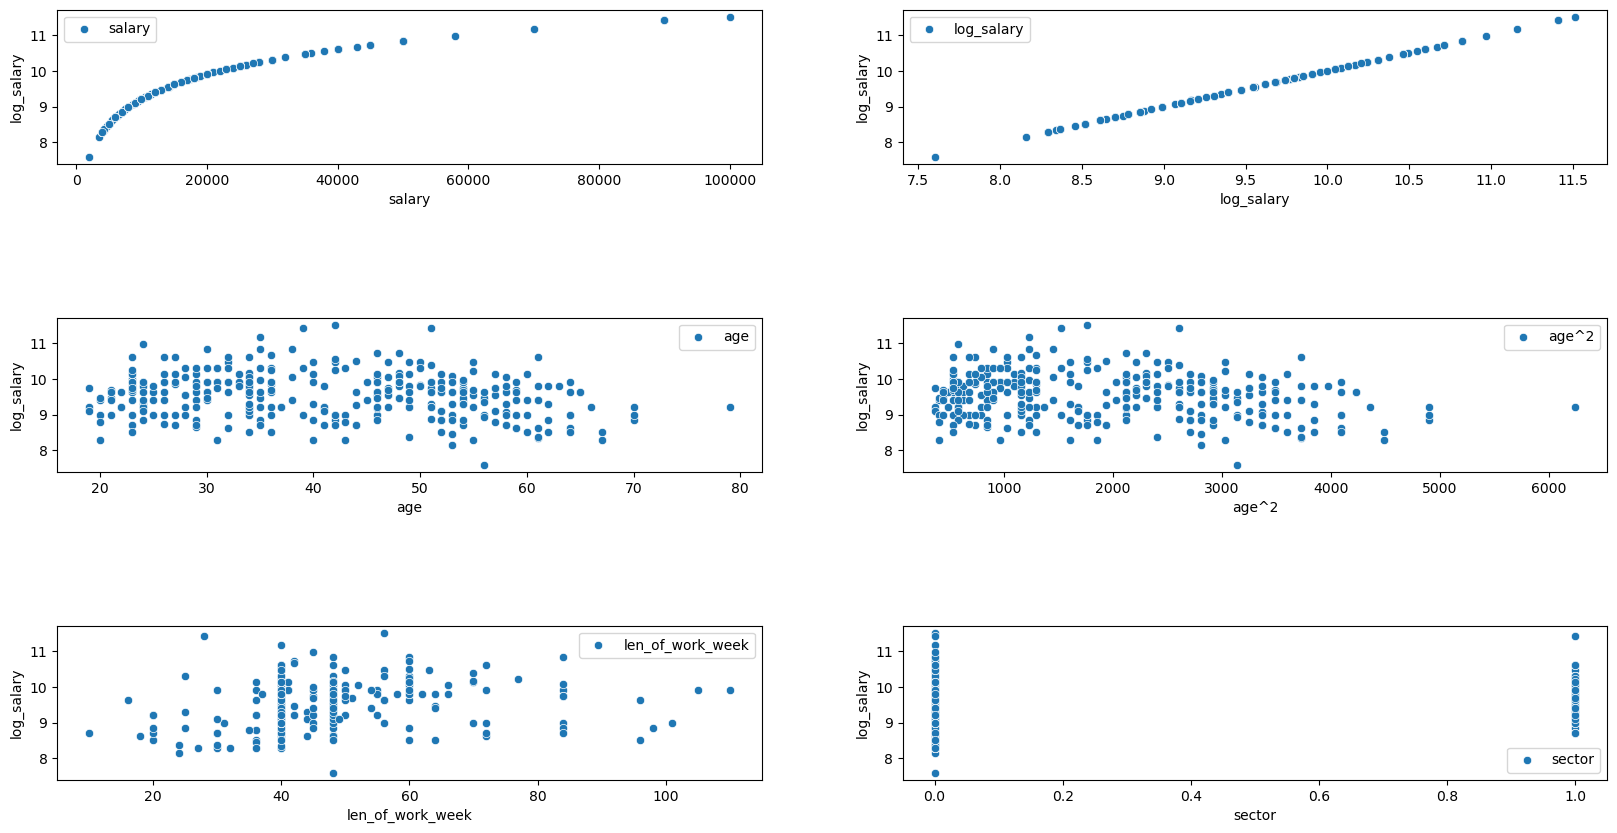

In [60]:
fig, ax = plt.subplots(3,2, figsize = (20,10))
features = ['salary', 'log_salary', 'age', 'age^2', 'len_of_work_week', 'sector']
plt.subplots_adjust(hspace=1)
for axi, elem in zip(ax.flat, features):
    sns.scatterplot(data = df_2010, x = elem, y = 'log_salary', label = elem, ax = axi)
    
    plt.legend()


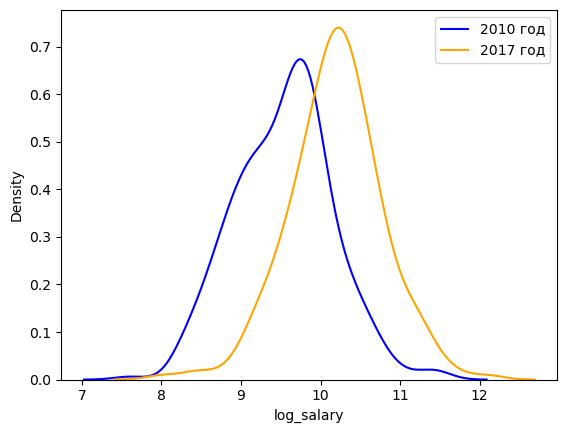

In [33]:
figsize = (20,10)
sns.kdeplot(data = df_2010, x = 'log_salary', label = '2010 год', color = 'blue')
sns.kdeplot(data = df_2017, x = 'log_salary', label = '2017 год', color = 'orange')
plt.legend()
plt.show()

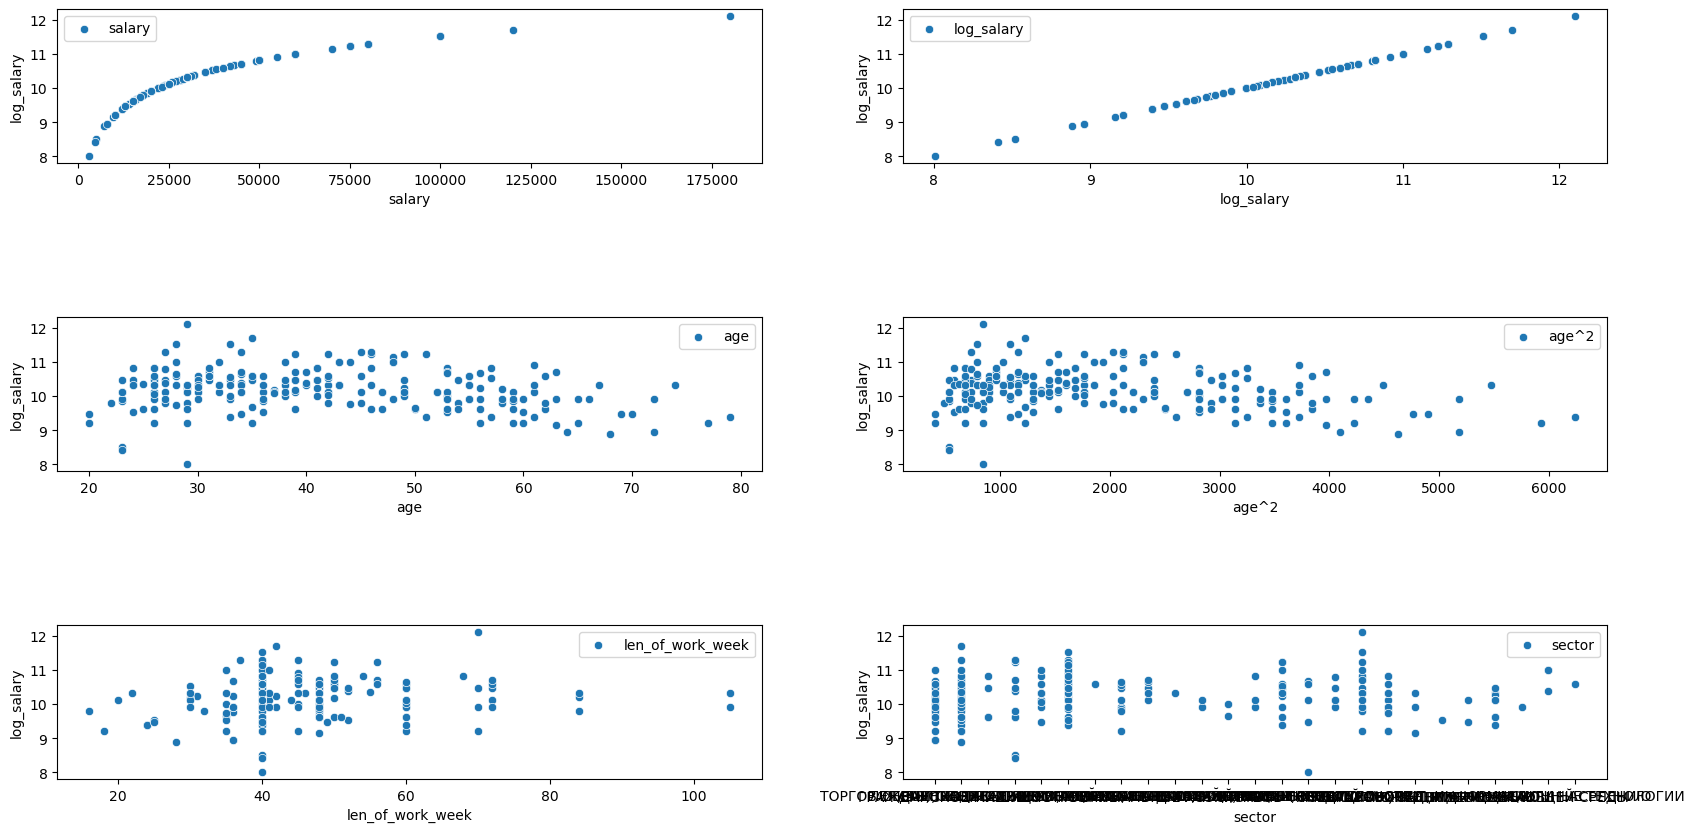

In [34]:
fig, ax = plt.subplots(3,2, figsize = (20,10))
features = ['salary', 'log_salary', 'age', 'age^2', 'len_of_work_week', 'sector']
plt.subplots_adjust(hspace=1)
for axi, elem in zip(ax.flat, features):
    sns.scatterplot(data = df_2017, x = elem, y = 'log_salary', label = elem, ax = axi)
    plt.legend()


In [96]:
df_2010 = pd.read_csv('data_2010.csv')
df_2017 = pd.read_csv('data_2017.csv')

df_2010['age^2'] = df_2010['age'].apply(lambda x: x**2)
df_2010['gender'] = df_2010['gender'].apply(lambda x: 1 if x == 'ЖЕНСКИЙ' else 0)#женщины - 1, мужчины - 0
df_2010['is_married'] = df_2010['is_married'].apply(lambda x: 1 if x in ['Состоят в браке'] else 0)#в браке - 1, не в браке - 0
df_2010['education_level_2'] = df_2010['education_level_2'].apply(lambda x: 1 if x == 'законченное высшее образование и выше' else 0)#вышка - 1, иначе - 0
df_2010['education_level'] = df_2010['education_level'].apply(lambda x: 1 if x in ['Высшее'] else 0)#вышка - 1, иначе - 0
df_2010['firm_size'] = df_2010['firm_size'].apply(lambda x: 1 if x in ['Крупное'] else 0)#крупные - 1, остальные - 0
df_2010['foreign_language'] = df_2010['foreign_language'].apply(lambda x: 1 if x =='Да' else 0)#знает ин яз - 1, иначе - 0
df_2010['is_government'] = df_2010['is_government'].apply(lambda x: 1 if x =='Да' else 0)#гос владелец - 1, иначе - 0
df_2010['is_dang_prod'] = df_2010['is_dang_prod'].apply(lambda x: 1 if x == 'Да' else 0)#опасная работа - 1, иначе - 0
df_2010['is_more_than_school'] = df_2010['is_more_than_school'].apply(lambda x: 1 if x == 'Да' else 0)#наличе образования кроме школьного - 1, иначе - 0

#Высокодоходный сектор или нет
df_2010['sector'] = df_2010['sector'].apply(lambda x: 1 if x in ['НЕФТЕГАЗОВАЯ ПРОМЫШЛЕННОСТЬ', 'ФИНАНСЫ', 'ТРАНСПОРТ, СВЯЗЬ', 'ЭНЕРГЕТИЧЕСКАЯ ПРОМЫШЛЕННОСТЬ'] else 0)

#Руководители или нет
df_2010['top_qual'] = df_2010['job_group'].apply(lambda x: 1 if x in ['Специалисты высшего уровня квалификации','Законодатели; крупные чиновники; руководители высш. и сред. звена'] else 0)
df_2010['low_qual'] = df_2010['job_group'].apply(lambda x: 1 if x in ['Неквалифицированные рабочие всех отраслей'] else 0)#работники низкой квалификации
#Квалифицированные рабочие
df_2010['proletariat'] = df_2010['job_group'].apply(lambda x: 1 if x in ['Квалифицированные рабочие, занятые ручным трудом','Квалифицированные рабочие, использующие машины и механизмы'] else 0)
df_2010['office_and_services'] = df_2010['job_group'].apply(lambda x: 1 if x in ['Служащие офисные и по обслуживанию клиентов'] else 0)
df_2010_clear = df_2010.drop(['job_group'],axis=1).dropna(axis = 0)


df_2017['age^2'] = df_2017['age'].apply(lambda x: x**2) 
df_2017['gender'] = df_2017['gender'].apply(lambda x: 1 if x == 'ЖЕНСКИЙ' else 0)#женщины - 1, мужчины - 0
df_2017['is_married'] = df_2017['is_married'].apply(lambda x: 1 if x in ['Состоят в браке'] else 0)#в браке - 1, не в браке - 0
df_2017['education_level_2'] = df_2017['education_level_2'].apply(lambda x: 1 if x == 'законченное высшее образование и выше' else 0)#вышка - 1, иначе - 0
df_2017['education_level'] = df_2017['education_level'].apply(lambda x: 1 if x in ['Высшее'] else 0)#вышка - 1, иначе - 0
df_2017['firm_size'] = df_2017['firm_size'].apply(lambda x: 1 if x in ['Крупное'] else 0)#крупные - 1, остальные - 0
df_2017['foreign_language'] = df_2017['foreign_language'].apply(lambda x: 1 if x =='Да' else 0)#знает ин яз - 1, иначе - 0
df_2017['is_government'] = df_2017['is_government'].apply(lambda x: 1 if x =='Да' else 0)#гос владелец - 1, иначе - 0
df_2017['is_dang_prod'] = df_2017['is_dang_prod'].apply(lambda x: 1 if x == 'Да' else 0)#опасная работа - 1, иначе - 0
df_2017['is_more_than_school'] = df_2017['is_more_than_school'].apply(lambda x: 1 if x == 'Да' else 0)#наличе образования кроме школьного - 1, иначе - 0

#Высокодоходный сектор или нет
df_2017['sector'] = df_2017['sector'].apply(lambda x: 1 if x in ['НЕФТЕГАЗОВАЯ ПРОМЫШЛЕННОСТЬ', 'ФИНАНСЫ', 'ТРАНСПОРТ, СВЯЗЬ', 'ЭНЕРГЕТИЧЕСКАЯ ПРОМЫШЛЕННОСТЬ'] else 0)

#Руководители или нет
df_2017['top_qual'] = df_2017['job_group'].apply(lambda x: 1 if x in ['cпециалисты высшего уровня квалификации','законодатели; крупные чиновники; руководители высш. и сред. звена'] else 0)
df_2017['low_qual'] = df_2017['job_group'].apply(lambda x: 1 if x in ['неквалифицированные рабочие всех отраслей'] else 0)#работники низкой квалификации
#Квалифицированные рабочие
df_2017['proletariat'] = df_2017['job_group'].apply(lambda x: 1 if x in ['квалифицированные рабочие, занятые ручным трудом','квалифицированные рабочие, использующие машины и механизмы'] else 0)
df_2017['office_and_services'] = df_2017['job_group'].apply(lambda x: 1 if x in ['служащие офисные и по обслуживанию клиентов'] else 0)
df_2017_clear = df_2017.drop(['job_group'],axis=1).dropna(axis = 0)



Построим первую регрессию логарифимированной зависимой переменной на пол \
Зависимя переменная была логарифмирована в силу своей лог-нормальной формы распределения и того, что в многочисленных эконометрических исследованиях зарплату советуют логарифмировать: Ganzach Y., Pazy A. The Scaling and Modeling of Pay and the Robustness of the Effect of CoreSelf Evaluations on Career Success

In [107]:
model1 = smf.ols(
    formula='log_salary ~ gender',
    data=df_2010
)
result = model1.fit(cov_type='HC3')
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     46.25
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           4.77e-11
Time:                        15:42:59   Log-Likelihood:                -293.01
No. Observations:                 338   AIC:                             590.0
Df Residuals:                     336   BIC:                             597.7
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7706      0.044    219.856      0.0

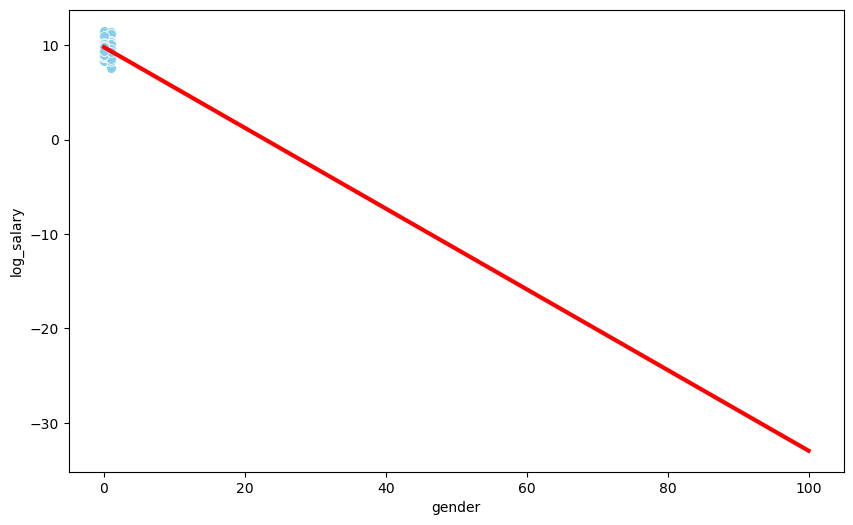

In [111]:
plt.figure(figsize = (10,6))

sns.scatterplot(data = df_2010, x = 'gender', y = 'log_salary', s = 50, alpha =1, color = 'skyblue')
x = np.linspace(0, 100, 1000)
y = result.params['Intercept'] + result.params['gender']*x
plt.plot(x, y, color='red', linewidth=3, label='Linear Regression')


In [112]:
model1 = smf.ols(
    formula='log_salary ~ gender',
    data=df_2017
)
result = model1.fit(cov_type='HC3')
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     45.55
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           1.25e-10
Time:                        15:44:01   Log-Likelihood:                -179.50
No. Observations:                 227   AIC:                             363.0
Df Residuals:                     225   BIC:                             369.8
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4462      0.051    203.887      0.0

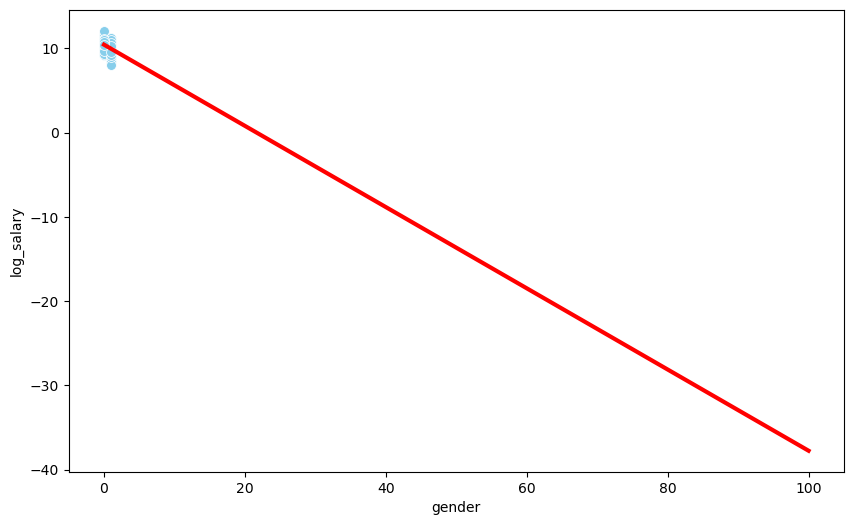

In [113]:
plt.figure(figsize = (10,6))

sns.scatterplot(data = df_2017, x = 'gender', y = 'log_salary', s = 50, alpha =1, color = 'skyblue')
x = np.linspace(0, 100, 1000)
y = result.params['Intercept'] + result.params['gender']*x
plt.plot(x, y, color='red', linewidth=3, label='Linear Regression')


<Axes: >

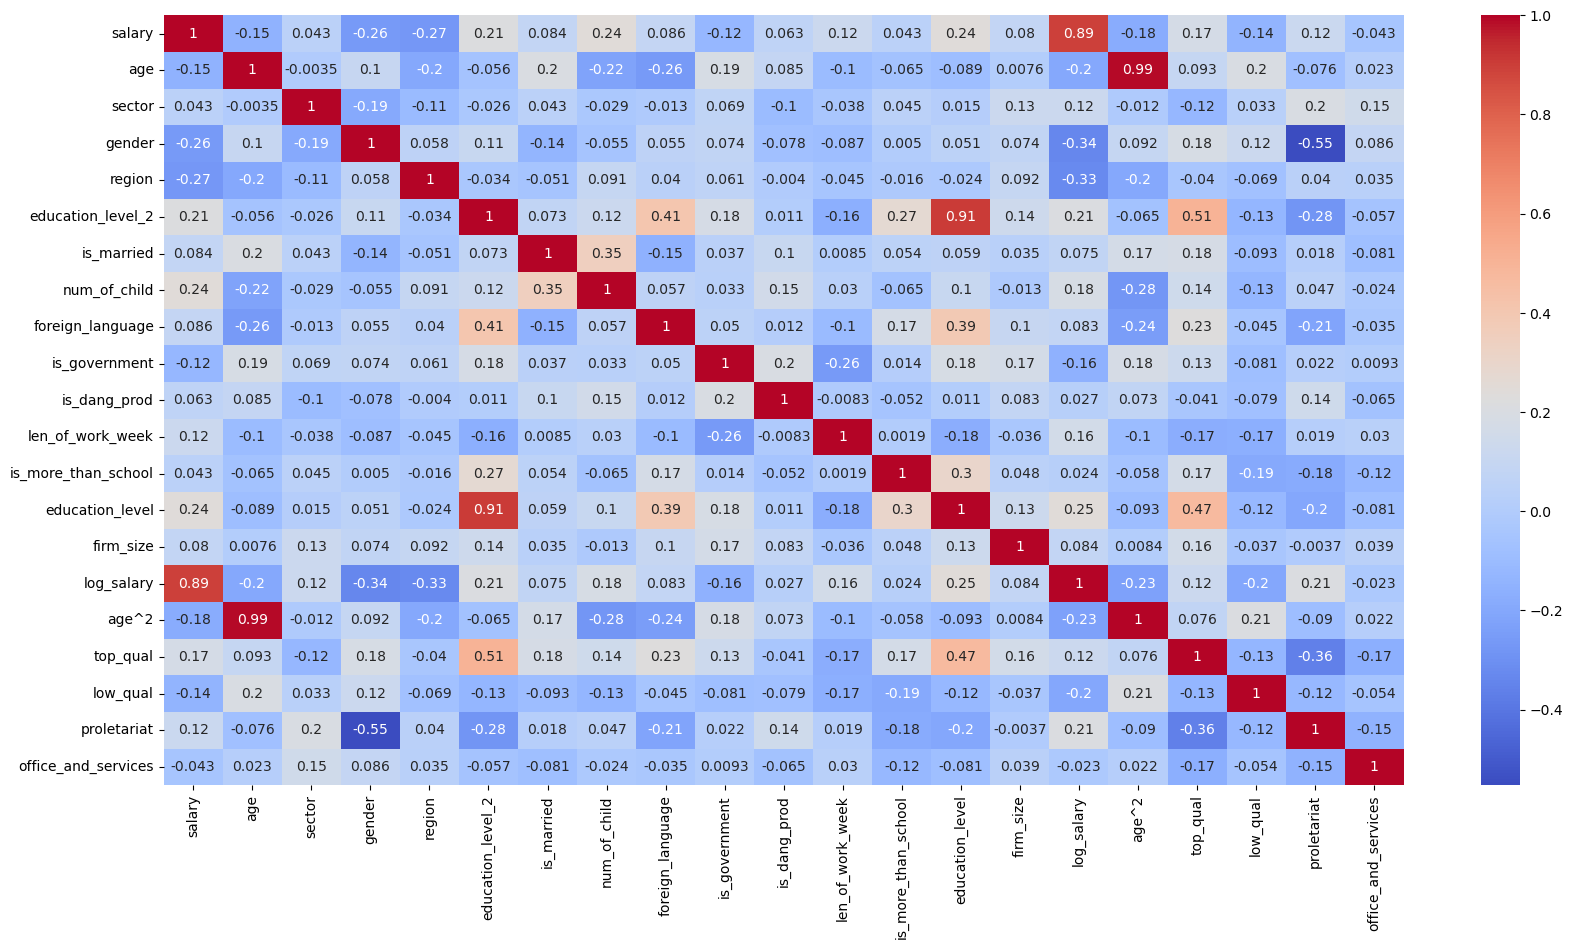

In [86]:
fig = plt.subplots(figsize=(20,10))
sns.heatmap(df_2010_clear.corr(), annot=True, cmap='coolwarm')

<Axes: >

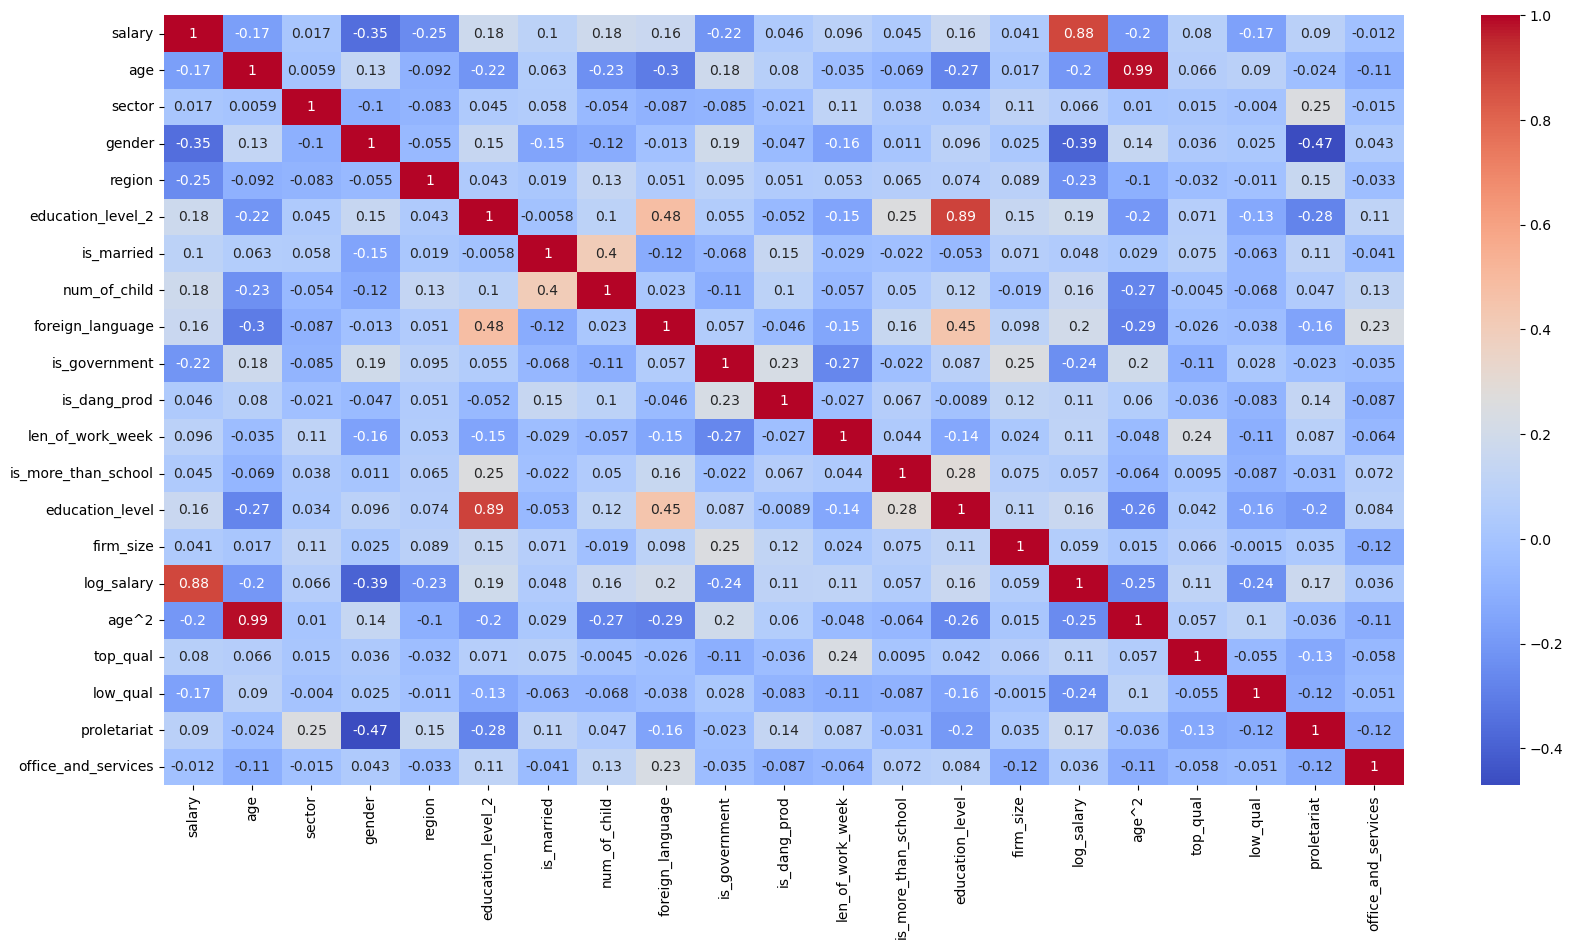

In [97]:
fig = plt.subplots(figsize=(20,10))
sns.heatmap(df_2017_clear.corr(), annot=True, cmap='coolwarm')

Можем заметить, что:
- Очевидная сильная корреляция между salary и log_salary, age и age^2, education_level и education_level_2 
- Имеется корреляция между gender и proletariat, education_level и foreign_language, is_married и num_of_child

## Строим модель №1
Цель на данном этапе - отобрать две базовые модели для 2010 и 2017 года и попробовать применить на них тест Чоу, чтобы понять, есть ли структурный сдвиг. Но для этого нужно сначала скорректировать зарплату на инфляцию

In [102]:
df_2017_infl = df_2017_clear.copy()
df_2017_infl['base_salary'] = df_2017_clear['salary'] / 1.585
df_2017_infl['log_base_salary'] = df_2017_infl['base_salary'].apply(lambda x: np.log(x))

<Axes: xlabel='base_salary', ylabel='Density'>

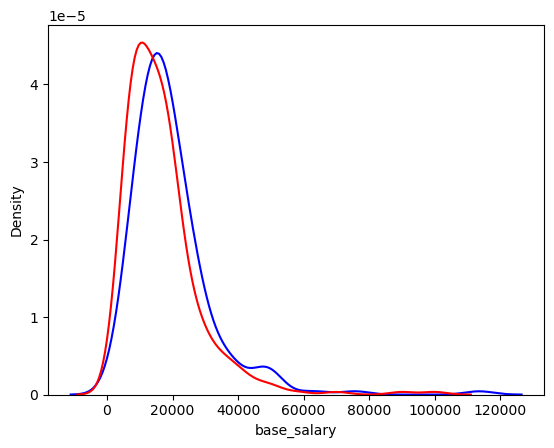

In [104]:
sns.kdeplot(data = df_2017_infl, x = 'base_salary', color='blue')
sns.kdeplot(data = df_2010_clear, x = 'salary', color='red')

In [106]:
df_2010_clear.columns

Index(['salary', 'age', 'sector', 'gender', 'region', 'education_level_2',
       'is_married', 'num_of_child', 'foreign_language', 'is_government',
       'is_dang_prod', 'len_of_work_week', 'is_more_than_school',
       'education_level', 'firm_size', 'log_salary', 'age^2', 'top_qual',
       'low_qual', 'proletariat', 'office_and_services'],
      dtype='object')

In [145]:
model_base_2010 = smf.ols(
    formula='log_salary ~ gender + education_level_2 + region + age',
    data=df_2010_clear
)
result_base_2010 = model_base_2010.fit(cov_type='HC3')
print(result_base_2010.summary())

                            OLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     36.78
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           2.92e-25
Time:                        16:01:24   Log-Likelihood:                -238.18
No. Observations:                 322   AIC:                             486.4
Df Residuals:                     317   BIC:                             505.2
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.2832      0.10

In [144]:
model_base_2017 = smf.ols(
    formula='log_base_salary ~ gender + education_level_2 + region + age',
    data=df_2017_infl
)
result_base_2017 = model_base_2017.fit(cov_type='HC3')
print(result_base_2017.summary())

                            OLS Regression Results                            
Dep. Variable:        log_base_salary   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     21.41
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           7.57e-15
Time:                        16:01:19   Log-Likelihood:                -147.88
No. Observations:                 217   AIC:                             305.8
Df Residuals:                     212   BIC:                             322.7
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.2629      0.14

In [ ]:
formula = ('log_salary ~ gender + age + education_level_2 + region')

In [146]:
df_2010_cho = df_2010_clear.copy()
df_2010_cho['year'] = 1
df_2017_infl['year'] = 0

df_cho = pd.concat([df_2010_cho, df_2017_infl], ignore_index=True)

In [147]:
# Общая модель (ограниченная, H0: одна модель)
pooled = smf.ols(formula=formula, data=df_cho).fit().get_robustcov_results(cov_type='HC3') 
SSR_pooled = sum(pooled.resid ** 2)

# Модель на 2010
model_2010 = smf.ols(formula=formula, data=df_2010_cho).fit().get_robustcov_results(cov_type='HC3') 
SSR_2010 = sum(model_2010.resid ** 2)

# Модель на 2017
model_2017 = smf.ols(formula=formula, data=df_2017_infl).fit().get_robustcov_results(cov_type='HC3') 
SSR_2017 = sum(model_2017.resid ** 2)

In [148]:

k = len(pooled.params)     
n1 = len(df_2010_cho)
n2 = len(df_2017_infl)

# F-статистика теста Чоу
numerator = (SSR_pooled - (SSR_2010 + SSR_2017)) / k
denominator = (SSR_2010 + SSR_2017) / (n1 + n2 - 2 * k)
F_chow = numerator / denominator

# p-value
p_value = 1 - stats.f.cdf(F_chow, dfn=k, dfd=n1 + n2 - 2 * k)

print(f"Тест Чоу:")
print(f"  F = {F_chow:.4f}")
print(f"  p-value = {p_value:.4f}")
print(f"  Число параметров (k) = {k}")
print(f"  Наблюдений: 2010 = {n1}, 2017 = {n2}")

if p_value < 0.05:
    print("\n Отклоняем H0: между 2010 и 2017 годами произошёл структурный сдвиг.")
else:
    print("\n Не отклоняем H0: модель стабильна во времени.")

Тест Чоу:
  F = 40.4696
  p-value = 0.0000
  Число параметров (k) = 5
  Наблюдений: 2010 = 322, 2017 = 217

 Отклоняем H0: между 2010 и 2017 годами произошёл структурный сдвиг.


Видим, что даже с поправкой на инфляцию зарплаты произошел структурный сдвиг, значит данные объединить нельзя. В качестве базовых моделей закрепим те, которые были использованы для теста Чоу

In [151]:
model_base_2017 = smf.ols(
    formula='log_salary ~ gender + education_level_2 + region + age',
    data=df_2017_clear
)
result_base_2017 = model_base_2017.fit(cov_type='HC3')
print(result_base_2017.summary())

                            OLS Regression Results                            
Dep. Variable:             log_salary   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     21.41
Date:                Wed, 21 Jan 2026   Prob (F-statistic):           7.57e-15
Time:                        16:08:31   Log-Likelihood:                -147.88
No. Observations:                 217   AIC:                             305.8
Df Residuals:                     212   BIC:                             322.7
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.7235      0.14

In [152]:
#Дальше переделать подбор альтернативной модели для двух годов

## Модель 1
Модель 2010 года, не статзначимы: брак, кол-во несовершеннолетних детей, опасное производство \
Модель 2017 года, не статзначимы: возраст, размер фирмы, кол-во несовершеннолетних детей, средняя продолжительность рабочей недели

In [13]:
df_2010_hm.head()

,oj13_2,o_age,oj4_1,oh5,region,o_diplom_1,oj72_173,oj260,oj23,om71,oj21_3,oj6_2,o_educ_trans,oj13_trans,log_target,age^2,is_family,o_centr_age
0,6000.0,54,0,1,1.0,0,0,0,1,1,0,40.0,0,0,8.699515,2916,0,12.674556
1,5700.0,29,0,1,1.0,1,0,1,1,0,0,48.0,1,0,8.648221,841,0,-12.325444
2,12000.0,54,0,1,1.0,0,0,0,1,0,1,40.0,0,1,9.392662,2916,0,12.674556
3,8000.0,28,0,1,1.0,1,0,0,1,0,0,40.0,1,1,8.987197,784,0,-13.325444
4,7000.0,52,0,1,1.0,0,1,0,0,0,0,98.0,0,0,8.853665,2704,0,10.674556


In [139]:
#ТА САМАЯ БАЗОВАЯ МОДЕЛЬ ДЛЯ 2010 ГОДА
formula = (
    "log_target ~ o_centr_age + I(o_centr_age**2)+ oh5 + o_diplom_1 + region + oj13_trans + is_family + oj72_173 + oj6_2 + oj21_3"
)

model = smf.ols(formula=formula, data=df_2010_hm)
result_1 = model.fit(cov_type='HC3')
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_target   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     23.30
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           1.57e-32
Time:                        06:03:07   Log-Likelihood:                -218.32
No. Observations:                 322   AIC:                             458.6
Df Residuals:                     311   BIC:                             500.2
Df Model:                          10                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.7172      0.131     74.302      0.000       9.461       9.974
o_centr_age            -0.0073      0.002     -3.311      0.001      -0.012      -0.003
I(o_centr_age ** 2)    -0.0007      0.000     -4.521      0.000      -0.001      -0.000
oh5                    -0.4083      0.056     -7.303      0.000      -0.518      -0.299
o_diplom_1              0.2635      0.058      4.528      0.000       0.149       0.378
region                 -0.4386      0.056     -7.815      0.000      -0.549      -0.329
oj13_trans              0.2188      0.089      2.458      0.014       0.044       0.393
is_family              -0.0495      0.065     -0.765      0.445      -0.176       0.077
oj72_173                0.0640      0.057      1.123      0.262      -0.048       0.176
oj6_2                   0.0059      0.002      2.484      0.013       0.001       0.010
oj21_3                 -0.0315      0.095     -0.332      0.740      -0.217       0.154
==============================================================================
Omnibus:                        2.040   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.361   Jarque-Bera (JB):                1.825
Skew:                           0.099   Prob(JB):                        0.401
Kurtosis:                       3.312   Cond. No.                     1.21e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
result_1.params

Intercept              9.717225
o_centr_age           -0.007323
I(o_centr_age ** 2)   -0.000702
oh5                   -0.408313
o_diplom_1             0.263503
region                -0.438560
oj13_trans             0.218777
is_family             -0.049475
oj72_173               0.064050
oj6_2                  0.005857
oj21_3                -0.031495
dtype: float64

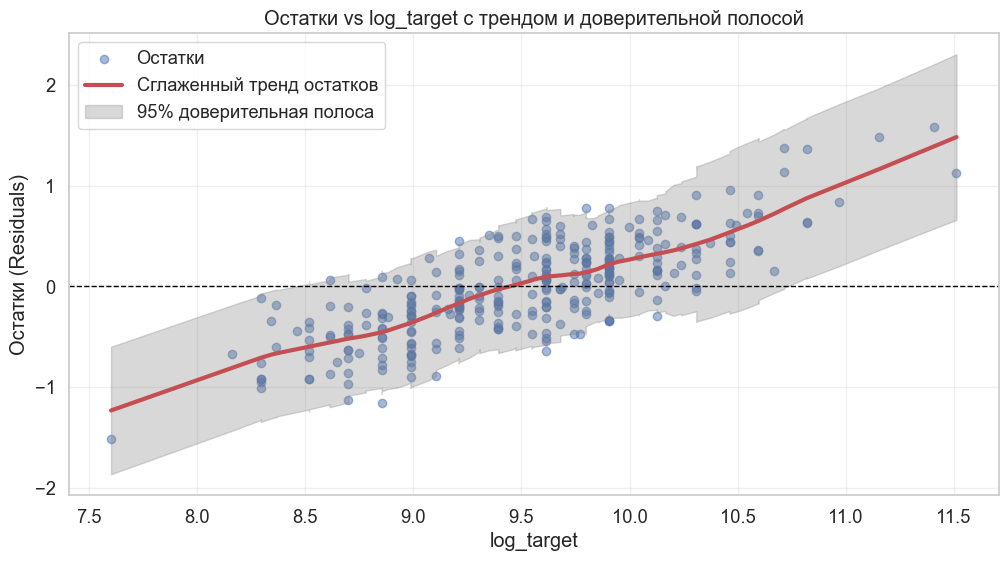

In [124]:
plt.figure(figsize=(12, 6))

# Подготовка данных
x_vals = df_2010_hm['log_target'].values
y_vals = result_1.resid.values

# Сортировка для красивой линии
sort_idx = np.argsort(x_vals)
x_sorted = x_vals[sort_idx]
y_sorted = y_vals[sort_idx]

# LOWESS сглаживание
lowess_result = lowess(y_sorted, x_sorted, frac=0.3, return_sorted=False)

# График
plt.scatter(x_vals, y_vals, alpha=0.5, label='Остатки')

# Сглаженная линия
plt.plot(x_sorted, lowess_result, 'r-', linewidth=3, 
         label='Сглаженный тренд остатков')

# Доверительная полоса (простая версия через rolling std)
window = len(x_sorted) // 10
rolling_mean = np.convolve(y_sorted, np.ones(window)/window, mode='same')
rolling_std = np.array([np.std(y_sorted[max(0,i-window):min(len(y_sorted),i+window)]) 
                       for i in range(len(y_sorted))])

plt.fill_between(x_sorted, 
                 lowess_result - 1.96*rolling_std,
                 lowess_result + 1.96*rolling_std,
                 alpha=0.3, color='gray', label='95% доверительная полоса')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('log_target')
plt.ylabel('Остатки (Residuals)')
plt.title('Остатки vs log_target с трендом и доверительной полосой')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

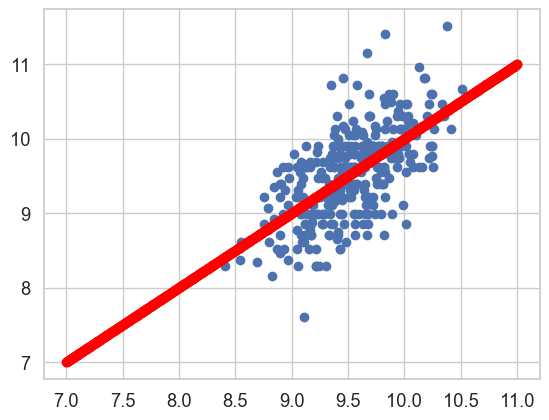

In [130]:
plt.scatter(x = result_1.fittedvalues, y = df_2010_hm['log_target'])
k = np.linspace(7, 11, 1000)
plt.scatter(x = k, y = k, color = 'red')

In [9]:

formula = (
    "log_target ~ v_centr_age + I(v_centr_age**2) + vh5 + v_diplom + region + vj13_trans + is_family + vj72_173 + vj6_2 + vj21_3"
)

model = smf.ols(formula=formula, data=df_2017_hm)
result_2 = model.fit(cov_type='HC3')
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_target   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     15.64
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           1.01e-20
Time:                        14:47:13   Log-Likelihood:                -126.90
No. Observations:                 217   AIC:                             275.8
Df Residuals:                     206   BIC:                             313.0
Df Model:                          10                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.5305      0.160     65.729      0.000      10.217      10.845
v_centr_age             0.0011      0.003      0.388      0.698      -0.005       0.007
I(v_centr_age ** 2)    -0.0009      0.000     -5.452      0.000      -0.001      -0.001
vh5                    -0.4638      0.067     -6.880      0.000      -0.596      -0.332
v_diplom                0.2972      0.070      4.227      0.000       0.159       0.435
region                 -0.3619      0.070     -5.148      0.000      -0.500      -0.224
vj13_trans              0.0742      0.090      0.825      0.410      -0.102       0.251
is_family              -0.1148      0.064     -1.807      0.071      -0.239       0.010
vj72_173                0.0334      0.051      0.649      0.516      -0.067       0.134
vj6_2                   0.0034      0.003      1.257      0.209      -0.002       0.009
vj21_3                  0.1613      0.069      2.349      0.019       0.027       0.296
==============================================================================
Omnibus:                       37.112   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.929
Skew:                          -0.589   Prob(JB):                     3.38e-32
Kurtosis:                       6.826   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:

def calculate_vif(model_result):
    """
    Рассчитывает VIF для всех независимых переменных в модели.
    
    Args:
        model_result: Результат .fit() из statsmodels
    
    Returns:
        pd.DataFrame: Таблица с переменными и их VIF
    """
    # Получаем матрицу признаков (X) из модели
    X = model_result.model.exog
    
    # Получаем имена переменных (без константы)
    feature_names = model_result.model.exog_names
    
    # Удаляем константу (intercept) — для неё VIF не считается
    if 'Intercept' in feature_names:
        intercept_idx = feature_names.index('Intercept')
        X = np.delete(X, intercept_idx, axis=1)
        feature_names = feature_names[:intercept_idx] + feature_names[intercept_idx+1:]
    
    # Рассчитываем VIF для каждой переменной
    vif_data = []
    for i, feature in enumerate(feature_names):
        # Важно: используем матрицу без константы
        vif = variance_inflation_factor(X, i)
        vif_data.append({'Переменная': feature, 'VIF': vif})
    
    # Создаём DataFrame и сортируем по убыванию VIF
    vif_df = pd.DataFrame(vif_data)
    vif_df = vif_df.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    
    return vif_df

# 3. Запускаем расчёт VIF для вашей модели
vif_results_1 = calculate_vif(result_1)
vif_results_2 = calculate_vif(result_2)



In [140]:
vif_results_1

,Переменная,VIF
0,oj6_2,4.786895
1,is_family,2.652415
2,region,2.194387
3,oh5,2.186401
4,I(o_centr_age ** 2),2.158613
5,oj72_173,2.056581
6,o_diplom_1,1.668554
7,o_centr_age,1.268403
8,oj13_trans,1.215133
9,oj21_3,1.205904


In [79]:
#ТА САМАЯ БАЗОВАЯ МОДЕЛЬ ДЛЯ 2010 ГОДА БЕЗ НЕСТАТЗНАЧИМЫХ КОЭФФИЦИЕНТОВ
formula = (
    "log_target ~ o_centr_age + I(o_centr_age**2)+ oh5 + o_diplom_1 + region + oj13_trans + oj6_2"
)

model = smf.ols(formula=formula, data=df_2010_hm)
result_3 = model.fit(cov_type='HC3')
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_target   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     32.90
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           3.55e-34
Time:                        17:48:14   Log-Likelihood:                -219.33
No. Observations:                 322   AIC:                             454.7
Df Residuals:                     314   BIC:                             484.9
Df Model:                           7                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.7185      0.128     76.061      0.000       9.468       9.969
o_centr_age            -0.0084      0.002     -4.295      0.000      -0.012      -0.005
I(o_centr_age ** 2)    -0.0008      0.000     -4.989      0.000      -0.001      -0.000
oh5                    -0.4029      0.054     -7.472      0.000      -0.509      -0.297
o_diplom_1              0.2679      0.058      4.586      0.000       0.153       0.382
region                 -0.4344      0.055     -7.888      0.000      -0.542      -0.326
oj13_trans              0.2106      0.087      2.420      0.016       0.040       0.381
oj6_2                   0.0059      0.002      2.511      0.012       0.001       0.010
==============================================================================
Omnibus:                        2.781   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                2.648
Skew:                           0.126   Prob(JB):                        0.266
Kurtosis:                       3.365   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
vif_result_3 = calculate_vif(result_3)
vif_result_3

,Переменная,VIF
0,oj6_2,3.510143
1,oh5,2.151358
2,region,2.151045
3,I(o_centr_age ** 2),1.925791
4,o_diplom_1,1.581771
5,oj13_trans,1.200163
6,o_centr_age,1.082198


In [25]:
result_3.resid

0     -0.188224
1     -0.770539
2      0.294278
3     -0.584209
4     -0.426498
         ...   
330    0.163740
331   -0.072761
335    0.195658
336   -0.351324
337   -0.204706
Length: 322, dtype: float64

<Figure size 1500x1000 with 0 Axes>

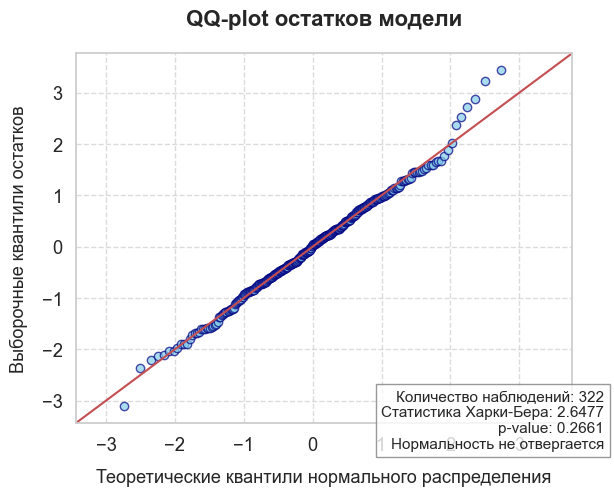

In [26]:
from statsmodels.graphics.gofplots import qqplot


# 1. Создаем фигуру с настройками для публикации
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid", font_scale=1.2)

# 2. Строим QQ-plot с помощью statsmodels
qqplot(
    result_3.resid,                # Остатки вашей модели
    dist=stats.norm,               # Сравнение с нормальным распределением
    line='45',                     # Прямая линия под 45 градусов
    fit=True,                      # Автоматически подгоняет линию
    marker='o',                    # Форма точек
    markersize=6,                  # Размер точек
    markerfacecolor='skyblue',     # Цвет точек
    markeredgecolor='navy',        # Цвет контура точек
    alpha=0.7                      # Прозрачность
)

# 3. Улучшаем оформление графика
plt.title('QQ-plot остатков модели', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Теоретические квантили нормального распределения', fontsize=13, labelpad=10)
plt.ylabel('Выборочные квантили остатков', fontsize=13, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)

# 4. Добавляем статистическую информацию в угол графика
n = len(result_3.resid)
stat, p_value = stats.jarque_bera(result_3.resid)  # Тест Шапиро-Уилка

# Форматируем текст для отображения
stats_text = (
    f'Количество наблюдений: {n}\n'
    f'Статистика Харки-Бера: {stat:.4f}\n'
    f'p-value: {p_value:.4f}\n'
    f'{"Нормальность отвергается (p < 0.05)" if p_value < 0.05 else "Нормальность не отвергается"}'
)

plt.figtext(
    0.95, 0.05,                  # Позиция (правый нижний угол)
    stats_text,
    ha='right',
    va='bottom',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
    fontsize=11
)


# 6. Отображаем график
plt.show()


Попытка в переменные взаимодействия

In [32]:

formula = (
    "log_target ~ o_centr_age + I(o_centr_age**2)+ oh5 + o_diplom_1 + region + oj13_trans + oj6_2 + oh5*oj4_1 + oh5 * oj13_trans + oh5*region + oh5 * oj6_2 + oh5*o_diplom_1"
    
)

#oh5*oj4_1 + oh5 * oj13_trans + oh5*region + oh5 * oj6_2 + oh5*o_diplom_1 + oh5*is_family

model = smf.ols(formula=formula, data=df_2010_hm)
result_4 = model.fit(cov_type='HC3')
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_target   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     17.55
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           3.40e-30
Time:                        15:02:14   Log-Likelihood:                -218.70
No. Observations:                 322   AIC:                             465.4
Df Residuals:                     308   BIC:                             518.2
Df Model:                          13                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.7567      0.237     41.082      0.000       9.291      10.222
o_centr_age            -0.0082      0.002     -4.051      0.000      -0.012      -0.004
I(o_centr_age ** 2)    -0.0008      0.000     -4.846      0.000      -0.001      -0.000
oh5                    -0.4689      0.279     -1.680      0.093      -1.016       0.078
o_diplom_1              0.2470      0.085      2.891      0.004       0.080       0.414
region                 -0.4317      0.080     -5.428      0.000      -0.588      -0.276
oj13_trans              0.1217      0.129      0.944      0.345      -0.131       0.374
oj6_2                   0.0055      0.005      1.197      0.231      -0.004       0.015
oj4_1                  -0.0279      0.088     -0.317      0.752      -0.201       0.145
oh5:oj4_1               0.0761      0.130      0.583      0.560      -0.180       0.332
oh5:oj13_trans          0.1351      0.181      0.747      0.455      -0.220       0.490
oh5:region             -0.0079      0.111     -0.071      0.943      -0.225       0.209
oh5:oj6_2               0.0006      0.005      0.109      0.913      -0.010       0.011
oh5:o_diplom_1          0.0351      0.120      0.293      0.770      -0.200       0.270
==============================================================================
Omnibus:                        2.829   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                2.713
Skew:                           0.125   Prob(JB):                        0.258
Kurtosis:                       3.373   Cond. No.                     2.78e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 2.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#Тест на совместную значимость
hypothesis_terms = "oh5:oj4_1=0,oh5:oj13_trans=0, oh5:region=0, oh5:oj6_2=0, oh5:o_diplom_1=0, oh5:is_family=0"


# Используем кортеж напрямую
f_test_result = result_3.f_test(hypothesis_terms)
f_test_result


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.3079639776403136, p=0.9326043468880157, df_denom=306, df_num=6>

In [42]:
df_2010_hm

,oj13_2,o_age,oj4_1,oh5,region,o_diplom_1,oj72_173,oj260,oj23,om71,oj21_3,oj6_2,o_educ_trans,oj13_trans,log_target,age^2,is_family,o_centr_age
0,6000.0,54,0,1,1.0,0,0,0,1,1,0,40.0,0,0,8.699515,2916,0,12.674556
1,5700.0,29,0,1,1.0,1,0,1,1,0,0,48.0,1,0,8.648221,841,0,-12.325444
2,12000.0,54,0,1,1.0,0,0,0,1,0,1,40.0,0,1,9.392662,2916,0,12.674556
3,8000.0,28,0,1,1.0,1,0,0,1,0,0,40.0,1,1,8.987197,784,0,-13.325444
4,7000.0,52,0,1,1.0,0,1,0,0,0,0,98.0,0,0,8.853665,2704,0,10.674556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,25000.0,40,1,0,0.0,0,1,0,1,1,0,40.0,0,0,10.126631,1600,1,-1.325444
331,20000.0,36,0,0,0.0,0,0,0,0,1,0,40.0,1,0,9.903488,1296,0,-5.325444
335,18000.0,58,0,0,0.0,0,0,0,1,1,1,40.0,0,0,9.798127,3364,1,16.674556
336,10000.0,55,0,1,0.0,1,0,0,1,0,0,40.0,1,0,9.210340,3025,1,13.674556


In [64]:
df_2010_hm

,oj13_2,o_age,oj4_1,oh5,region,o_diplom_1,oj72_173,oj260,oj23,om71,...,oj13_trans,log_target,age^2,is_family,o_centr_age,top_qual,low_qual,proletariat,office_ans_services,warrior
0,6000.0,54,0,1,1.0,0,0,0,1,1,...,0,8.699515,2916,0,12.674556,0,1,0,0,0
1,5700.0,29,0,1,1.0,1,0,1,1,0,...,0,8.648221,841,0,-12.325444,1,0,0,0,0
2,12000.0,54,0,1,1.0,0,0,0,1,0,...,1,9.392662,2916,0,12.674556,0,0,0,0,0
3,8000.0,28,0,1,1.0,1,0,0,1,0,...,1,8.987197,784,0,-13.325444,1,0,0,0,0
4,7000.0,52,0,1,1.0,0,1,0,0,0,...,0,8.853665,2704,0,10.674556,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,25000.0,40,1,0,0.0,0,1,0,1,1,...,0,10.126631,1600,1,-1.325444,0,0,1,0,0
331,20000.0,36,0,0,0.0,0,0,0,0,1,...,0,9.903488,1296,0,-5.325444,0,0,1,0,0
335,18000.0,58,0,0,0.0,0,0,0,1,1,...,0,9.798127,3364,1,16.674556,0,0,1,0,0
336,10000.0,55,0,1,0.0,1,0,0,1,0,...,0,9.210340,3025,1,13.674556,0,0,0,0,0


In [33]:

formula = (
    "log_target ~ o_centr_age + I(o_centr_age**2)+ oh5 + o_diplom_1 + region + oj6_2 + top_qual + proletariat + oh5*top_qual"
)

#oh5*oj4_1 + oh5 * oj13_trans + oh5*region + oh5 * oj6_2 + oh5*o_diplom_1 + oh5*is_family

model = smf.ols(formula=formula, data=df_2010_hm)
result_5 = model.fit(cov_type='HC3')
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_target   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     26.02
Date:                Tue, 23 Dec 2025   Prob (F-statistic):           2.62e-33
Time:                        15:02:43   Log-Likelihood:                -216.06
No. Observations:                 322   AIC:                             452.1
Df Residuals:                     312   BIC:                             489.9
Df Model:                           9                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.4711      0.147     64.260      0.000       9.182       9.760
o_centr_age            -0.0091      0.002     -4.721      0.000      -0.013      -0.005
I(o_centr_age ** 2)    -0.0006      0.000     -4.587      0.000      -0.001      -0.000
oh5                    -0.2249      0.079     -2.864      0.004      -0.379      -0.071
o_diplom_1              0.2498      0.069      3.625      0.000       0.115       0.385
region                 -0.4292      0.055     -7.798      0.000      -0.537      -0.321
oj6_2                   0.0068      0.002      2.871      0.004       0.002       0.011
top_qual                0.3559      0.120      2.970      0.003       0.121       0.591
proletariat             0.2693      0.084      3.214      0.001       0.105       0.434
oh5:top_qual           -0.2472      0.140     -1.764      0.078      -0.522       0.027
==============================================================================
Omnibus:                        3.998   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                4.158
Skew:                           0.153   Prob(JB):                        0.125
Kurtosis:                       3.466   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Figure size 1500x1000 with 0 Axes>

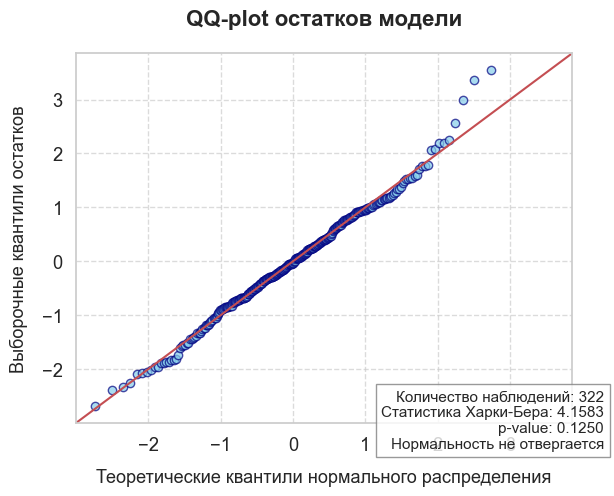

In [34]:
from statsmodels.graphics.gofplots import qqplot


# 1. Создаем фигуру с настройками для публикации
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid", font_scale=1.2)

# 2. Строим QQ-plot с помощью statsmodels
qqplot(
    result_5.resid,                # Остатки вашей модели
    dist=stats.norm,               # Сравнение с нормальным распределением
    line='45',                     # Прямая линия под 45 градусов
    fit=True,                      # Автоматически подгоняет линию
    marker='o',                    # Форма точек
    markersize=6,                  # Размер точек
    markerfacecolor='skyblue',     # Цвет точек
    markeredgecolor='navy',        # Цвет контура точек
    alpha=0.7                      # Прозрачность
)

# 3. Улучшаем оформление графика
plt.title('QQ-plot остатков модели', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Теоретические квантили нормального распределения', fontsize=13, labelpad=10)
plt.ylabel('Выборочные квантили остатков', fontsize=13, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)

# 4. Добавляем статистическую информацию в угол графика
n = len(result_5.resid)
stat, p_value = stats.jarque_bera(result_5.resid)  # Тест Харки-Бера

# Форматируем текст для отображения
stats_text = (
    f'Количество наблюдений: {n}\n'
    f'Статистика Харки-Бера: {stat:.4f}\n'
    f'p-value: {p_value:.4f}\n'
    f'{"Нормальность отвергается (p < 0.05)" if p_value < 0.05 else "Нормальность не отвергается"}'
)

plt.figtext(
    0.95, 0.05,                  # Позиция (правый нижний угол)
    stats_text,
    ha='right',
    va='bottom',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
    fontsize=11
)


# 6. Отображаем график
plt.show()


In [141]:
#ФИНАЛЬНАЯ САМАЯ ЛУЧШАЯ АЛЬТЕРНАТИВНАЯ МОДЕЛЬ ДЛЯ 2010 ГОДА
formula = (
    "log_target ~ o_centr_age + I(o_centr_age**2)+ oh5 + o_diplom_1 + region + oj6_2 + top_qual + proletariat"
)

#oh5*oj4_1 + oh5 * oj13_trans + oh5*region + oh5 * oj6_2 + oh5*o_diplom_1 + oh5*is_family

model = smf.ols(formula=formula, data=df_2010_hm)
result_6 = model.fit(cov_type='HC3')
result_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_target   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     28.11
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           7.92e-33
Time:                        06:04:11   Log-Likelihood:                -217.76
No. Observations:                 322   AIC:                             453.5
Df Residuals:                     313   BIC:                             487.5
Df Model:                           8                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.5315      0.144     65.966      0.000       9.248       9.815
o_centr_age            -0.0088      0.002     -4.488      0.000      -0.013      -0.005
I(o_centr_age ** 2)    -0.0006      0.000     -4.481      0.000      -0.001      -0.000
oh5                    -0.3128      0.067     -4.679      0.000      -0.444      -0.182
o_diplom_1              0.2550      0.069      3.711      0.000       0.120       0.390
region                 -0.4259      0.055     -7.737      0.000      -0.534      -0.318
oj6_2                   0.0068      0.002      2.897      0.004       0.002       0.011
top_qual                0.1787      0.080      2.244      0.025       0.023       0.335
proletariat             0.2135      0.080      2.673      0.008       0.057       0.370
==============================================================================
Omnibus:                        2.470   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                2.318
Skew:                           0.110   Prob(JB):                        0.314
Kurtosis:                       3.353   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

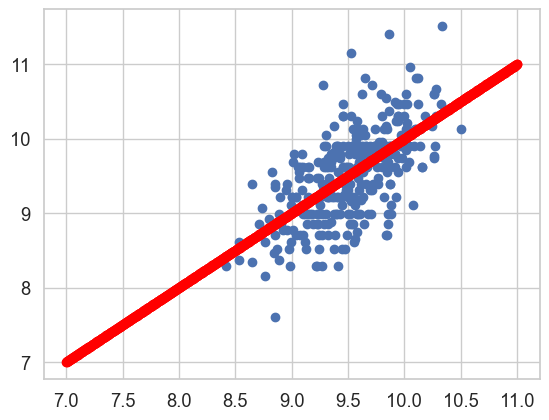

In [131]:
plt.scatter(x = result_6.fittedvalues, y = df_2010_hm['log_target'])
k = np.linspace(7, 11, 1000)
plt.scatter(x = k, y = k, color = 'red')

In [142]:
current = calculate_vif(result_6)
current

,Переменная,VIF
0,oj6_2,4.698402
1,oh5,2.700582
2,region,2.221175
3,o_diplom_1,2.167294
4,top_qual,2.010742
5,I(o_centr_age ** 2),1.932799
6,proletariat,1.781890
7,o_centr_age,1.103678


<Figure size 1500x1000 with 0 Axes>

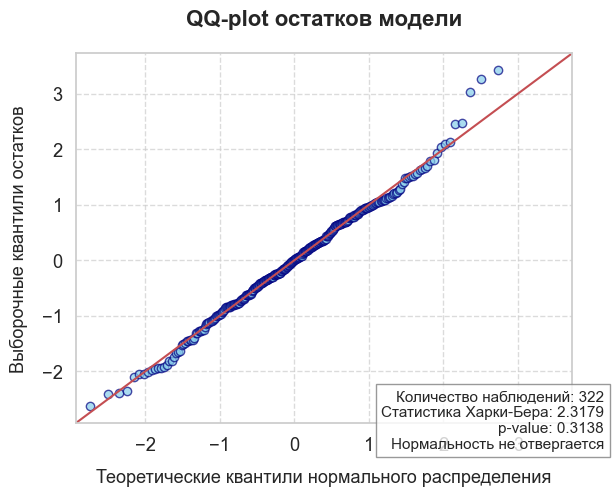

In [100]:
from statsmodels.graphics.gofplots import qqplot


# 1. Создаем фигуру с настройками для публикации
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid", font_scale=1.2)

# 2. Строим QQ-plot с помощью statsmodels
qqplot(
    result_6.resid,                # Остатки вашей модели
    dist=stats.norm,               # Сравнение с нормальным распределением
    line='45',                     # Прямая линия под 45 градусов
    fit=True,                      # Автоматически подгоняет линию
    marker='o',                    # Форма точек
    markersize=6,                  # Размер точек
    markerfacecolor='skyblue',     # Цвет точек
    markeredgecolor='navy',        # Цвет контура точек
    alpha=0.7                      # Прозрачность
)

# 3. Улучшаем оформление графика
plt.title('QQ-plot остатков модели', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Теоретические квантили нормального распределения', fontsize=13, labelpad=10)
plt.ylabel('Выборочные квантили остатков', fontsize=13, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)

# 4. Добавляем статистическую информацию в угол графика
n = len(result_6.resid)
stat, p_value = stats.jarque_bera(result_6.resid)  # Тест Харки-Бера

# Форматируем текст для отображения
stats_text = (
    f'Количество наблюдений: {n}\n'
    f'Статистика Харки-Бера: {stat:.4f}\n'
    f'p-value: {p_value:.4f}\n'
    f'{"Нормальность отвергается (p < 0.05)" if p_value < 0.05 else "Нормальность не отвергается"}'
)

plt.figtext(
    0.95, 0.05,                  # Позиция (правый нижний угол)
    stats_text,
    ha='right',
    va='bottom',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
    fontsize=11
)


# 6. Отображаем график
plt.show()


Для 2017 года не статзначимы: возраст, наличие семьи, кол-во детей до 18, размер предприятия, доходная ли отрасль, ин яз, кол-во часов в неделю только ур знгач 10% \


In [146]:
df_2017_hm

,vj13_2,v_age,vj4_1,vh5,region,v_diplom,vj72_173,vj260,vj23,vm71,...,vj13_trans,log_target,age^2,is_family,v_centr_age,top_qual,low_qual,proletariat,office_ans_services,warrior
0,19000.0,36,0,1,1.0,1,0.0,1,1,0,...,0,9.852194,1296,0,-5.726872,1,0,0,0,0
1,16000.0,35,0,1,1.0,1,1.0,0,1,0,...,1,9.680344,1225,1,-6.726872,1,0,0,0,0
2,28000.0,29,0,0,1.0,0,0.0,1,0,0,...,1,10.239960,841,0,-12.726872,0,0,1,0,0
3,15000.0,50,0,1,1.0,0,0.0,0,1,0,...,1,9.615805,2500,1,8.273128,1,0,0,0,0
4,5000.0,23,0,1,1.0,0,0.0,0,0,0,...,0,8.517193,529,0,-18.726872,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,25000.0,23,1,1,0.0,1,0.0,1,0,0,...,0,10.126631,529,0,-18.726872,0,0,0,0,0
218,25000.0,23,1,1,0.0,1,0.0,1,0,0,...,0,10.126631,529,0,-18.726872,0,0,0,0,0
219,30000.0,32,0,1,0.0,1,0.0,1,1,0,...,0,10.308953,1024,1,-9.726872,1,0,0,0,0
224,17000.0,28,0,0,0.0,1,0.0,1,1,0,...,0,9.740969,784,0,-13.726872,1,0,0,0,0


In [135]:
df_2017_hm.columns

Index(['vj13_2', 'v_age', 'vj4_1', 'vh5', 'region', 'v_diplom', 'vj72_173',
       'vj260', 'vj23', 'vm71', 'vj21_3', 'vj6_2', 'v_educ_trans',
       'vj13_trans', 'log_target', 'age^2', 'is_family', 'v_centr_age',
       'top_qual', 'low_qual', 'proletariat', 'office_ans_services',
       'warrior'],
      dtype='object')

In [145]:
#ФИНАЛЬНАЯ САМАЯ ЛУЧШАЯ АЛЬТЕРНАТИВНАЯ МОДЕЛЬ ДЛЯ 2017 ГОДА
formula = (
    "log_target ~ I(v_centr_age**2) + vh5 + v_diplom + region + v_centr_age + low_qual + vh5*is_family"
)

# v_centr_age + low_qual + vh5*is_family
#I(v_age**2) + vh5 + v_diplom + region + v_centr_age + low_qual + vh5*is_family"


model = smf.ols(formula=formula, data=df_2017_hm)
result_17_1 = model.fit(cov_type='HC3')
result_17_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_target   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     22.11
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           3.21e-24
Time:                        06:08:07   Log-Likelihood:                -122.54
No. Observations:                 217   AIC:                             263.1
Df Residuals:                     208   BIC:                             293.5
Df Model:                           8                                         
Covariance Type:                  HC3                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.6613      0.088    121.506      0.000      10.489      10.833
I(v_centr_age ** 2)    -0.0010      0.000     -6.875      0.000      -0.001      -0.001
vh5                    -0.3098      0.091     -3.404      0.001      -0.488      -0.131
v_diplom                0.2521      0.067      3.738      0.000       0.120       0.384
region                 -0.3343      0.064     -5.244      0.000      -0.459      -0.209
v_centr_age             0.0009      0.003      0.311      0.756      -0.005       0.006
low_qual               -0.4287      0.129     -3.320      0.001      -0.682      -0.176
is_family               0.0662      0.093      0.713      0.476      -0.116       0.248
vh5:is_family          -0.2816      0.126     -2.227      0.026      -0.530      -0.034
==============================================================================
Omnibus:                       31.134   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.177
Skew:                          -0.544   Prob(JB):                     7.91e-22
Kurtosis:                       6.093   Cond. No.                     1.65e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

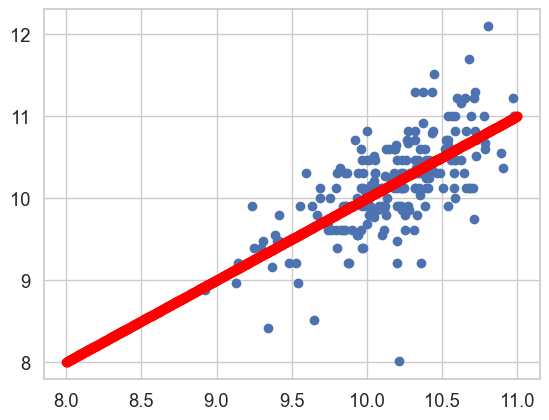

In [138]:
plt.scatter(x = result_17_1.fittedvalues, y = df_2017_hm['log_target'])
k = np.linspace(8, 11, 1000)
plt.scatter(x = k, y = k, color = 'red')

In [146]:
vif_17_1 = calculate_vif(result_17_1)
vif_17_1

,Переменная,VIF
0,vh5:is_family,3.529699
1,vh5,3.517937
2,is_family,2.867174
3,I(v_centr_age ** 2),1.997530
4,v_diplom,1.853107
5,region,1.791238
6,v_centr_age,1.271369
7,low_qual,1.076480


<Figure size 1500x1000 with 0 Axes>

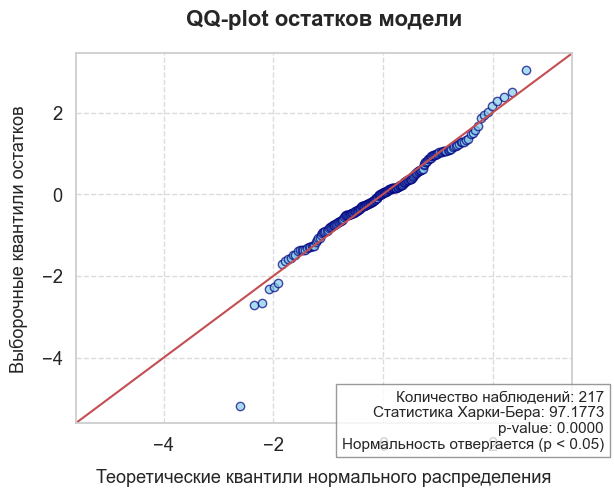

In [101]:
from statsmodels.graphics.gofplots import qqplot


# 1. Создаем фигуру с настройками для публикации
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid", font_scale=1.2)

# 2. Строим QQ-plot с помощью statsmodels
qqplot(
    result_17_1.resid,                # Остатки вашей модели
    dist=stats.norm,               # Сравнение с нормальным распределением
    line='45',                     # Прямая линия под 45 градусов
    fit=True,                      # Автоматически подгоняет линию
    marker='o',                    # Форма точек
    markersize=6,                  # Размер точек
    markerfacecolor='skyblue',     # Цвет точек
    markeredgecolor='navy',        # Цвет контура точек
    alpha=0.7                      # Прозрачность
)

# 3. Улучшаем оформление графика
plt.title('QQ-plot остатков модели', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Теоретические квантили нормального распределения', fontsize=13, labelpad=10)
plt.ylabel('Выборочные квантили остатков', fontsize=13, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)

# 4. Добавляем статистическую информацию в угол графика
n = len(result_17_1.resid)
stat, p_value = stats.jarque_bera(result_17_1.resid)  # Тест Шапиро-Уилка

# Форматируем текст для отображения
stats_text = (
    f'Количество наблюдений: {n}\n'
    f'Статистика Харки-Бера: {stat:.4f}\n'
    f'p-value: {p_value:.4f}\n'
    f'{"Нормальность отвергается (p < 0.05)" if p_value < 0.05 else "Нормальность не отвергается"}'
)

plt.figtext(
    0.95, 0.05,                  # Позиция (правый нижний угол)
    stats_text,
    ha='right',
    va='bottom',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
    fontsize=11
)


# 6. Отображаем график
plt.show()


In [73]:

def GQ_test(model_res, alpha = 0.05):
    y = model_res.model.endog
    x = model_res.model.exog
    exog_names = result_1.model.exog_names
    for i in range(1, len(exog_names)):
        var_name = exog_names[i]
        f, p_value, k = het_goldfeldquandt(
                    y, 
                    x, 
                    idx=i,
                    split=None,
                    alternative='two-sided'
                )
        if p_value < 0.05:
            status = 'ГЕТЕРОСКЕДАСТИЧНОСТЬ ЕСТЬ'
        else:
            status = 'ГОМОСКЕДАСТИЧНОСТЬ'
        print(f'Для {var_name} p_value равен {p_value}. Поэтому {status}')
            

In [72]:
GQ_test(model_res=result_1)

Для o_centr_age p_value равен 0.6885589040690543. Поэтому ГОМОСКЕДАСТИЧНОСТЬ
Для I(o_centr_age ** 2) p_value равен 0.973258486872508. Поэтому ГОМОСКЕДАСТИЧНОСТЬ
Для oh5 p_value равен 0.02622416823906853. Поэтому ГЕТЕРОСКЕДАСТИЧНОСТЬ ЕСТЬ
Для o_diplom_1 p_value равен 0.32058426502029785. Поэтому ГОМОСКЕДАСТИЧНОСТЬ
Для region p_value равен 0.041031692222873714. Поэтому ГЕТЕРОСКЕДАСТИЧНОСТЬ ЕСТЬ
Для oj13_trans p_value равен 0.009964134186366748. Поэтому ГЕТЕРОСКЕДАСТИЧНОСТЬ ЕСТЬ
Для is_family p_value равен 0.4636357113920696. Поэтому ГОМОСКЕДАСТИЧНОСТЬ
Для oj72_173 p_value равен 0.23826759806149547. Поэтому ГОМОСКЕДАСТИЧНОСТЬ
Для oj6_2 p_value равен 0.4043516765667362. Поэтому ГОМОСКЕДАСТИЧНОСТЬ
Для oj21_3 p_value равен 0.006007482000497786. Поэтому ГЕТЕРОСКЕДАСТИЧНОСТЬ ЕСТЬ


In [84]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

def BrPag (result_1):
    # 1. Извлекаем данные из вашей модели result_1
    # (замените result_1 на имя вашей модели)
    residuals = result_1.resid
    exog = result_1.model.exog  # матрица независимых переменных
    exog_names = result_1.model.exog_names  # имена переменных

    print("="*60)
    print("ТЕСТ БРЕУША-ПАГАНА НА ГЕТЕРОСКЕДАСТИЧНОСТЬ")
    print("="*60)

    # 2. Проводим тест
    bp_test = het_breuschpagan(residuals, exog)

    # 3. Распаковываем результаты
    lm_statistic = bp_test[0]
    lm_pvalue = bp_test[1]
    f_statistic = bp_test[2]
    f_pvalue = bp_test[3]

    # 4. Выводим результаты
    print(f"LM статистика: {lm_statistic:.4f}")
    print(f"p-value (LM): {lm_pvalue:.6f}")
    print(f"F статистика: {f_statistic:.4f}")
    print(f"p-value (F): {f_pvalue:.6f}")

    # 5. Интерпретация результатов
    alpha = 0.05
    if lm_pvalue < alpha:
        print(f"\n❌ Гетероскедастичность ПОДТВЕРЖДЕНА (p < {alpha})")
        print("→ Стандартные ошибки МНК смещены — необходима коррекция")
    else:
        print(f"\n✅ Гетероскедастичность НЕ ПОДТВЕРЖДЕНА (p > {alpha})")
        print("→ Стандартные ошибки МНК корректны")

    # 6. Дополнительная диагностика: какие переменные вносят вклад в гетероскедастичность
    print("\n" + "="*60)
    print("ДИАГНОСТИКА ИСТОЧНИКОВ ГЕТЕРОСКЕДАСТИЧНОСТИ")
    print("="*60)

    # Создаем DataFrame для анализа
    diagnostic_df = pd.DataFrame({
        'Переменная': exog_names,
        'Коэффициент': np.linalg.lstsq(exog, residuals**2, rcond=None)[0],
        'Стандартная ошибка': np.sqrt(np.diag(np.linalg.inv(exog.T @ exog)) * np.var(residuals**2))
    })

    # Сортируем по абсолютному значению коэффициентов
    diagnostic_df['abs_coef'] = np.abs(diagnostic_df['Коэффициент'])
    diagnostic_df = diagnostic_df.sort_values('abs_coef', ascending=False).reset_index(drop=True)

    # Выводим топ-5 переменных с наибольшим вкладом
    print("Топ-5 переменных, вероятно влияющих на гетероскедастичность:")
    print(diagnostic_df[['Переменная', 'Коэффициент']].head(5))

    # 7. Визуализация: остатки vs предсказанные значения
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=result_1.fittedvalues, y=residuals, alpha=0.6)
    plt.axhline(0, color='r', linestyle='--')
    plt.title('График остатков для проверки гетероскедастичности', fontsize=14)
    plt.xlabel('Предсказанные значения', fontsize=12)
    plt.ylabel('Остатки', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('breusch_pagan_residuals.png', dpi=150)
    plt.show()


ТЕСТ БРЕУША-ПАГАНА НА ГЕТЕРОСКЕДАСТИЧНОСТЬ
LM статистика: 19.9075
p-value (LM): 0.010692
F статистика: 2.5783
p-value (F): 0.009729

❌ Гетероскедастичность ПОДТВЕРЖДЕНА (p < 0.05)
→ Стандартные ошибки МНК смещены — необходима коррекция

ДИАГНОСТИКА ИСТОЧНИКОВ ГЕТЕРОСКЕДАСТИЧНОСТИ
Топ-5 переменных, вероятно влияющих на гетероскедастичность:
   Переменная  Коэффициент
0   Intercept     0.122089
1    top_qual     0.101518
2      region     0.061006
3         oh5     0.056763
4  o_diplom_1     0.022012


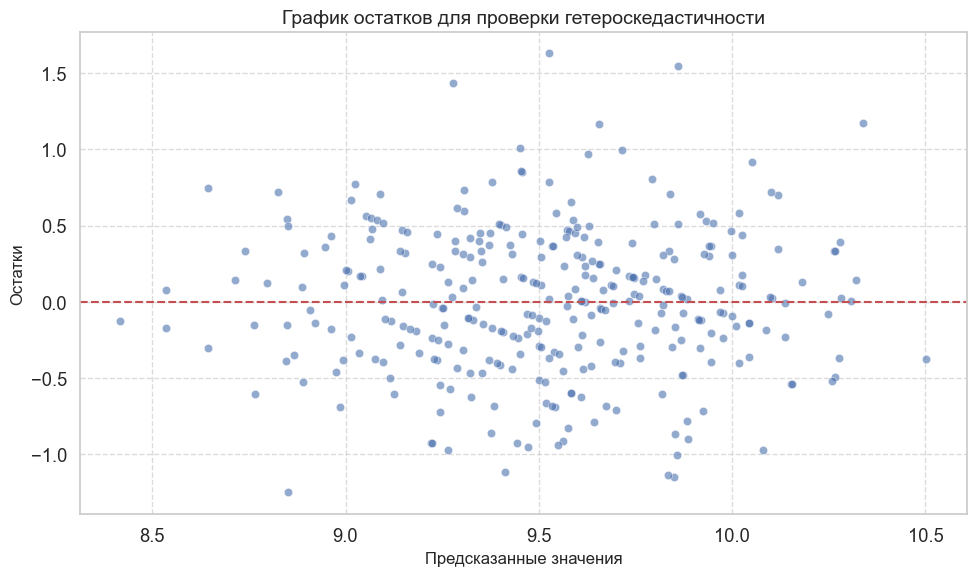

In [147]:
BrPag(result_6)

In [91]:
df_2017_hm.columns

Index(['vj13_2', 'v_age', 'vj4_1', 'vh5', 'region', 'v_diplom', 'vj72_173',
       'vj260', 'vj23', 'vm71', 'vj21_3', 'vj6_2', 'v_educ_trans',
       'vj13_trans', 'log_target', 'age^2', 'is_family', 'v_centr_age',
       'top_qual', 'low_qual', 'proletariat', 'office_ans_services',
       'warrior'],
      dtype='object')

In [143]:
#БАЗОВАЯ МОДЕЛЬ ДЛЯ 2017 ГОДА
formula = (
    "log_target ~ v_age + I(v_age**2) + vh5 + v_diplom + region + vj4_1 + vj72_173 + vj6_2 + vj13_trans + is_family + vj23"
)



model = smf.ols(formula=formula, data=df_2017_hm)
result_17_0 = model.fit(cov_type='HC3')
result_17_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_target   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     13.76
Date:                Wed, 24 Dec 2025   Prob (F-statistic):           1.33e-19
Time:                        06:05:20   Log-Likelihood:                -126.58
No. Observations:                 217   AIC:                             277.2
Df Residuals:                     205   BIC:                             317.7
Df Model:                          11                                         
Covariance Type:                  HC3                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.9322      0.355     25.167      0.000       8.237       9.628
v_age             0.0801      0.016      4.953      0.000       0.048       0.112
I(v_age ** 2)    -0.0009      0.000     -5.423      0.000      -0.001      -0.001
vh5              -0.4545      0.067     -6.773      0.000      -0.586      -0.323
v_diplom          0.2914      0.071      4.118      0.000       0.153       0.430
region           -0.3449      0.074     -4.658      0.000      -0.490      -0.200
vj4_1            -0.0247      0.071     -0.347      0.728      -0.164       0.115
vj72_173          0.0335      0.051      0.657      0.511      -0.066       0.133
vj6_2             0.0020      0.003      0.698      0.485      -0.004       0.008
vj13_trans        0.1315      0.088      1.490      0.136      -0.041       0.304
is_family        -0.1111      0.063     -1.758      0.079      -0.235       0.013
vj23             -0.1284      0.067     -1.908      0.056      -0.260       0.003
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.219
Skew:                          -0.664   Prob(JB):                     1.18e-29
Kurtosis:                       6.602   Cond. No.                     2.60e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 2.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
vif_17_0 = calculate_vif(result_17_0)
vif_17_0

,Переменная,VIF
0,v_age,109.343651
1,I(v_age ** 2),46.960479
2,vj6_2,14.964367
3,is_family,2.828575
4,vh5,2.450345
5,region,2.240223
6,vj23,2.178880
7,vj72_173,2.053272
8,v_diplom,1.832700
9,vj13_trans,1.417456


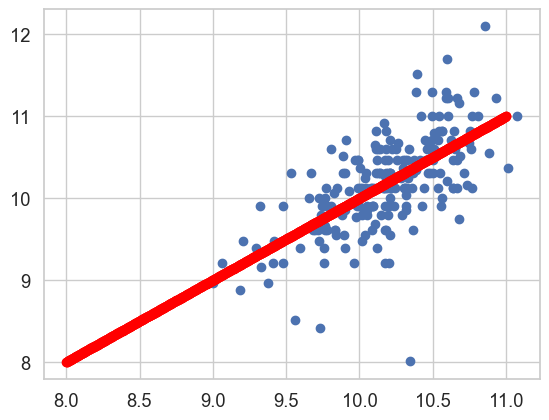

In [136]:
plt.scatter(x = result_17_0.fittedvalues, y = df_2017_hm['log_target'])
k = np.linspace(8, 11, 1000)
plt.scatter(x = k, y = k, color = 'red')